Goal: Improve Linear model using sfs and standardization of the target feature together.

In [25]:
##Load Modules
import numpy as np
import pandas as pd
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import set_config
from sklearn.metrics import r2_score
from sklearn.preprocessing import RobustScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [2]:
##Load data, first inspection, create dummies for RegionCode, Destination, HouseHoldSize
reg = pd.read_csv('C:/Users/morel/Downloads/Training Data 7-28-2025.csv')
reg = pd.get_dummies(reg, columns=['RegionCode','Destination','HHSize'], dtype=int)
print(reg.head())

   FamilyID  ResidentID  Bednights  HHEmployed  HHTANF  Slotted  SlottedCCM  \
0       243         957        957           1       0        0           0   
1       243         958        957           1       0        0           0   
2       243         959        957           1       0        0           0   
3       243         960        957           1       0        0           0   
4       242         973        944           1       0        1           1   

   SlottedPME  SingleMom  SingleDad  ...  Destination_10  Destination_11  \
0           0          1          0  ...               0               0   
1           0          1          0  ...               0               0   
2           0          1          0  ...               0               0   
3           0          1          0  ...               0               0   
4           0          0          0  ...               0               0   

   HHSize_2  HHSize_3  HHSize_4  HHSize_5  HHSize_6  HHSize_7  HHSiz

In [3]:
##EDA: no missing values expected. No duplicates expected.
print(reg.isna().sum(), reg.duplicated().any())

FamilyID          0
ResidentID        0
Bednights         0
HHEmployed        0
HHTANF            0
Slotted           0
SlottedCCM        0
SlottedPME        0
SingleMom         0
SingleDad         0
SingleParent      0
Disability        0
RegionCode_1      0
RegionCode_2      0
RegionCode_3      0
RegionCode_4      0
RegionCode_5      0
Destination_1     0
Destination_2     0
Destination_3     0
Destination_4     0
Destination_5     0
Destination_6     0
Destination_7     0
Destination_8     0
Destination_9     0
Destination_10    0
Destination_11    0
HHSize_2          0
HHSize_3          0
HHSize_4          0
HHSize_5          0
HHSize_6          0
HHSize_7          0
HHSize_8          0
HHSize_9          0
dtype: int64 False


In [4]:
##EDA: descriptive statistics
pd.set_option('display.max_columns', None)
reg.describe()

,FamilyID,ResidentID,Bednights,HHEmployed,HHTANF,Slotted,SlottedCCM,SlottedPME,SingleMom,SingleDad,SingleParent,Disability,RegionCode_1,RegionCode_2,RegionCode_3,RegionCode_4,RegionCode_5,Destination_1,Destination_2,Destination_3,Destination_4,Destination_5,Destination_6,Destination_7,Destination_8,Destination_9,Destination_10,Destination_11,HHSize_2,HHSize_3,HHSize_4,HHSize_5,HHSize_6,HHSize_7,HHSize_8,HHSize_9
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.00000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.00000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,459.344398,1758.165975,530.497925,0.726141,0.435685,0.680498,0.427386,0.253112,0.311203,0.062241,0.373444,0.004149,0.614108,0.099585,0.128631,0.149378,0.008299,0.124481,0.024896,0.26556,0.016598,0.136929,0.016598,0.066390,0.091286,0.029046,0.008299,0.219917,0.062241,0.248963,0.26556,0.195021,0.128631,0.029046,0.033195,0.037344
std,140.954579,467.250109,310.345548,0.446866,0.496878,0.467254,0.495729,0.435699,0.463949,0.242095,0.484725,0.064416,0.487818,0.300069,0.335488,0.357202,0.090908,0.330817,0.156133,0.44255,0.128024,0.344488,0.128024,0.249481,0.288615,0.168284,0.090908,0.415052,0.242095,0.433312,0.44255,0.397041,0.335488,0.168284,0.179518,0.189999
min,223.000000,957.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,281.000000,1200.000000,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,531.000000,2028.000000,448.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,574.000000,2110.000000,877.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,596.000000,2210.000000,1078.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
pd.reset_option('display.max_columns')
##FamilyID and ResidentID are not features. They are indiviual IDs and can't be interpretted. Only clients who move out in 2025 are considered due to
##the unique constraint they face of moving out under the knowledge that the program will end at the end of September 2025.
##Individuals stay at the facility for an average of 530 nights and for a median of 448 nights.The bednight distribution is left-skewed toward
##stays of fewer total bednights.The range is about 1000 nights with a minimum stay of 80 nights and a maximum stay of 1078 nights. 
##The IQR is 595 nights meaning half of our clients' stays at the facility are just over a year and a half. The range between 2 STDs under and
##over the median is -172 to 1068 or 1240 bednights. The maximum stay is an outlier to the top of the range and severely effects the STD and mean,
##because it's impossible to have a stay of negative bednights. The STD being pulled so positive to accomodate our longer stays forces
##an uninterpretable range below the median.
##The remaining variables are categorical (yes/no, 1/0) they are interpretable by considering the mean and median together.
##Most of our moved out households have had one employed adult (median = yes), the mean agrees showing 73% HHEmployed.
##Most of our moved out households do not receive TANF (median = no), the mean agress showing 44% recieving HHTANF.
##Most of our clients were approved for a lease before they moved out (median = yes), the mean agress shwoing 68% slotted.
##Specifically, 43% of our clients were approved through CCM or the apartment was secured by the client themselves.
##Similarly, 25% of our clients were approved through PME.
##37% of our clients are part of single parent households; specifically, 31% of our clients are part of single mother households and 6% part of
##single father households. The median agrees showing that the majority of our clients are not part of single parent households (median = no).
##Most of our moved out clients (61%, median = yes) have been from Angola, Congo Brazzaville, DRC, or Sierra Leone (RegionCode_1). 
##This bears out in a separate analysis linked here: https://github.com/morellikatherine90809/Housing-Equity/blob/main/Housing_Equity.ipynb, 
##showing that Africans have been significantly more often successfully housed over the course of the program as a whole.
##The most popular destinations for our clients to move to are Biddeford (27%) and Portland (22%).
##Households made up of 3 people (25%) and 4 people (27%) are the most common household make ups among our moved out clients.

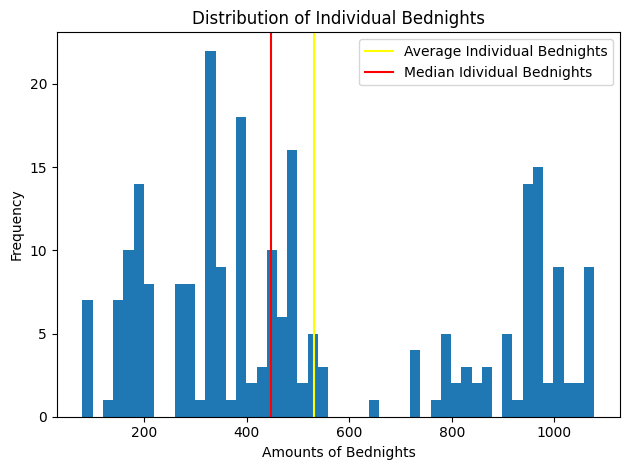

0    326
Name: Bednights, dtype: int64


<Figure size 640x480 with 0 Axes>

In [24]:
plt.hist(reg.Bednights, bins=50)
plt.axvline(x=reg.Bednights.mean(), ymin=0, ymax=1, label='Average Individual Bednights', color='yellow')
plt.axvline(x=reg.Bednights.median(), ymin=0, ymax=1, label='Median Idividual Bednights', color='red')
plt.legend()
plt.title('Distribution of Individual Bednights')
plt.xlabel('Amounts of Bednights')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
plt.clf()
print(reg.Bednights.mode())

In [6]:
##Regression Analysis: Predict bednights stayed - prepare data
##drop Bednights: target feature, FamilyID: groups for GroupKFold, ResidentID: unique identifier, not an input feature
x = reg.drop(columns=['Bednights','FamilyID','ResidentID'])
##create target feature df
y = reg['Bednights']
##create groups df for GroupKFold to keep all members of the same family together and prevent autocorrelation artificially improving model
groups = reg['FamilyID']

In [7]:
##Regression Analysis: Predict bednights stayed - prepare pipeline to scale target before sfs and model testing
base_model = LinearRegression()
model = TransformedTargetRegressor(
    regressor=base_model,
    transformer=RobustScaler()
)
pipe = Pipeline([
    ('model', model)
])

In [9]:
##Regression Analysis: Predict bednights stayed - create model (GroupKFold prevents autocorrelation from artificially improving model and serves to
##validate model at the same time), test/train model, scale with RobustScaler, choose meaningful features with SFS to improve on model where only
##scaling was carried out

##Create folds
gkf = GroupKFold(n_splits = 5)
cv_splits = list(gkf.split(x, y, groups=groups))

##Sequential Feature Selection
sfs = SequentialFeatureSelector(
    estimator=pipe,
    n_features_to_select='auto',
    direction='forward',
    scoring='r2',
    cv=cv_splits,
    n_jobs=-1
)

##Fit model with scaled target and SFS
sfs.fit(x, y)

##See features for improved model
print(f'Selected Features: {x.columns[sfs.get_support()].to_list()}')

Selected Features: ['HHEmployed', 'SlottedPME', 'SingleMom', 'SingleDad', 'SingleParent', 'Disability', 'RegionCode_3', 'RegionCode_4', 'RegionCode_5', 'Destination_2', 'Destination_4', 'Destination_10', 'HHSize_4', 'HHSize_7', 'HHSize_8', 'HHSize_9']


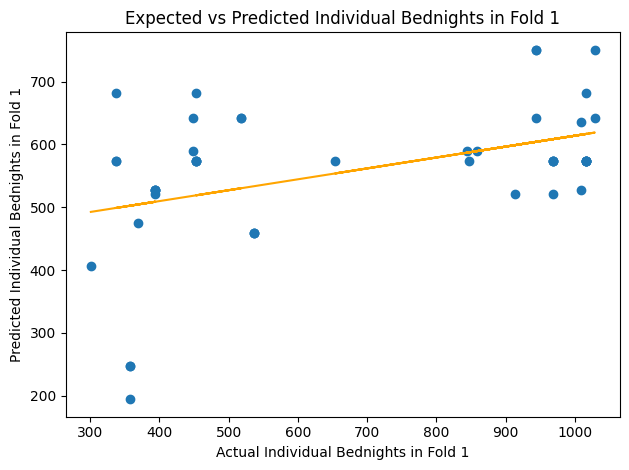

R^2 for Fold 1: -0.010450998200913775


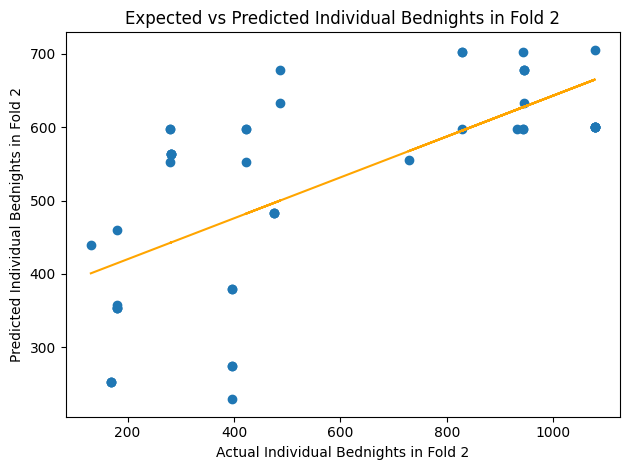

R^2 for Fold 2: 0.36368938357994385


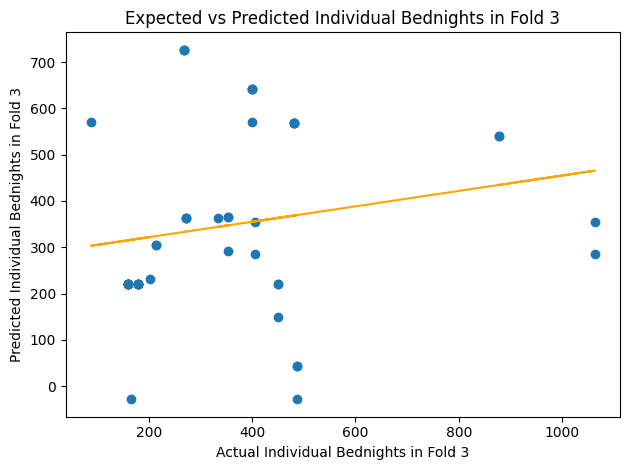

R^2 for Fold 3: -0.4450175169719248


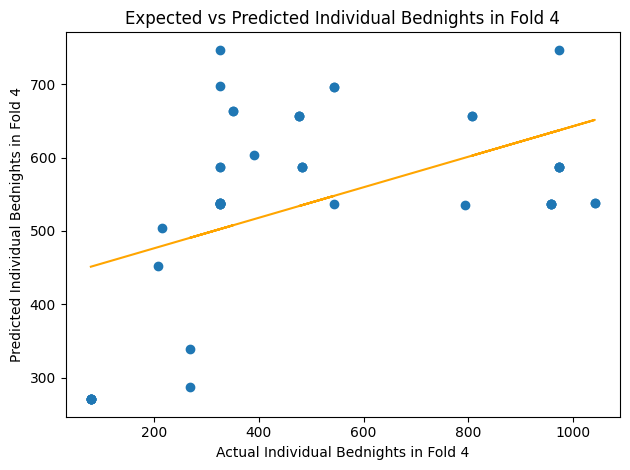

R^2 for Fold 4: 0.22079581552832217


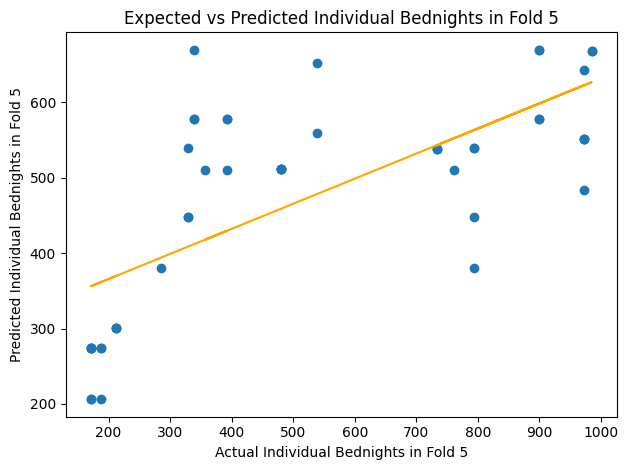

R^2 for Fold 5: 0.40508794891713795


<Figure size 640x480 with 0 Axes>

In [19]:
##Regression Analysis: Predict bednights stayed - Evaluate new model using SFS features

##Prepare features
x2 = reg[['HHEmployed', 'SlottedPME', 'SingleMom', 'SingleDad', 
        'SingleParent', 'Disability', 'RegionCode_3', 'RegionCode_4', 
        'RegionCode_5', 'Destination_2', 'Destination_4', 'Destination_10', 
        'HHSize_4', 'HHSize_7', 'HHSize_8', 'HHSize_9']]
y2 = reg['Bednights']
groups2 = reg['FamilyID']

##Split the data in each fold
for fold, (train_idx, test_idx) in enumerate(gkf.split(x2 , y2, groups2)):
    x_train, x_test = x2.iloc[train_idx], x2.iloc[test_idx]
    y_train, y_test = y2.iloc[train_idx], y2.iloc[test_idx]

    ##Scale target feature
    y_scaler = RobustScaler()
    y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1,1)).ravel()

    ##Train model and predict target values for each fold, unscale target
    model = LinearRegression()
    model.fit(x_train, y_train_scaled)
    y_pred_scaled = model.predict(x_test)
    y_pred = y_scaler.inverse_transform(y_pred_scaled .reshape(-1,1))
    
    ##Compare predicted and expected targets for each model
    plt.scatter(y_test, y_pred)
    plt.xlabel(f'Actual Individual Bednights in Fold {fold+1}')
    plt.ylabel(f'Predicted Individual Bednights in Fold {fold+1}')
    plt.title(f'Expected vs Predicted Individual Bednights in Fold {fold+1}')
    a, b = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, a*(y_test)+b, color='orange')
    plt.tight_layout()
    plt.show()
    plt.clf()

    r2 = r2_score(y_test, y_pred)
    print(f'R^2 for Fold {fold+1}: {r2}')

RobustScaler doesn't result in a usable model.